In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.matlib

In [3]:

# Example of getting neighbors for an instance
from math import sqrt

# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
	distances = list()
	for train_row in train:
		dist = euclidean_distance(test_row, train_row)
		distances.append((train_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors

# Test distance function
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
neighbors = get_neighbors(dataset, dataset[0], 3)
for neighbor in neighbors:
	print(neighbor)

# Example of getting neighbors for an instance
from math import sqrt
 
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)
 
# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
	distances = list()
	for train_row in train:
		dist = euclidean_distance(test_row, train_row)
		distances.append((train_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors
 
# Test distance function
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
neighbors = get_neighbors(dataset, dataset[0], 3)
for neighbor in neighbors:
	print(neighbor)

[2.7810836, 2.550537003, 0]
[3.06407232, 3.005305973, 0]
[1.465489372, 2.362125076, 0]
[2.7810836, 2.550537003, 0]
[3.06407232, 3.005305973, 0]
[1.465489372, 2.362125076, 0]


In [4]:
#lire csv
import pandas as pd
df = pd.read_csv("dataset_1.csv", index_col=0)
df.head()

,normalized_age,normalized_salary
0,0.680267,-0.016342
1,3.809518,0.798483
2,-1.661372,-0.577667
3,-0.257307,-0.155552
4,0.698017,0.174561


In [5]:
X = df.values #returns a numpy array*

In [6]:
X

array([[ 0.68026725, -0.01634235],
       [ 3.80951844,  0.79848348],
       [-1.6613724 , -0.57766695],
       ...,
       [-5.86152028,  3.06842556],
       [-5.01893361,  3.11090369],
       [-6.79933099,  2.08232074]])

In [7]:
dataset = df.astype(float).values.tolist()

In [8]:
dataset

[[0.6802672542242796, -0.01634235124987707],
 [3.809518438642478, 0.7984834812700092],
 [-1.6613723957898987, -0.5776669509655612],
 [-0.2573072541060864, -0.15555172507163811],
 [0.6980174532952329, 0.17456128595470471],
 [2.4722649618370576, 0.5673050456691022],
 [0.2068475280378083, -0.027433765917567986],
 [0.5672463565362535, 0.08908340767516418],
 [-0.34876904840186146, -0.23147121282208094],
 [-1.4519627568129319, -0.3729450658857801],
 [1.1111516122486131, 0.5167464197595522],
 [-1.2616805346909512, -0.38330962804852736],
 [-2.4724216468179, -0.8087217322382667],
 [-0.3182125450439171, -0.07944939174047805],
 [2.4979099088304846, 0.43446558652426825],
 [0.6428762833236951, 0.1357702652711778],
 [-3.367353995980676, -0.7035400125265595],
 [0.2657932474767661, 0.09733080257420727],
 [2.0440457429334997, 0.35792287144099244],
 [-0.5139146759780705, -0.08218841848933901],
 [-2.4140304932042578, -0.4631518783648809],
 [3.3163181718940424, 0.9509371771552172],
 [-0.7447263127390168, 

In [9]:
class K_Means:

    def __init__(self, k = 2):
        self.k = k
        
        
        self.centroids = {}
        #initialiser nombre 'k' de centroids
        for i in range(self.k):
            self.centroids[i] = df[i]
                    
        
        #creer les labels
        self.classes = {}
        for i in range(self.k):
            self.classes[i] = []
            print(self.classes)
        
        
        #find the distance between the point and cluster; choose the nearest centroid
		for features in data:
			distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
			classification = distances.index(min(distances))
			self.classes[classification].append(features)

TabError: inconsistent use of tabs and spaces in indentation (<ipython-input-9-0dd7a8d394a0>, line 21)

In [10]:
#df.plot()

In [11]:
#centroid1 = np.random.choice(X.shape[0], n, replace=False)
#centroid2 =

In [12]:
df.tail()

,normalized_age,normalized_salary
995,-5.060165,2.482045
996,-5.079404,2.773580
997,-5.861520,3.068426
998,-5.018934,3.110904
999,-6.799331,2.082321


In [13]:
index_centroid = np.random.choice(X.shape[0], 2, replace=False)

In [15]:
X.shape[1]

2

In [19]:
index_centroid

array([505, 742])

In [20]:
centroid1 = X[index_centroid[0]]
centroid2 = X[index_centroid[1]]

In [21]:
centroid1

array([-6.70023124,  4.17178999])

In [22]:
centroid2

array([-5.51848303,  3.03490009])

In [23]:
#index_centroid2 = np.random.choice(X.shape[0], 2, replace=False)

In [24]:
#centroid2 = X[index_centroid2[0]]

In [25]:
#centroid2

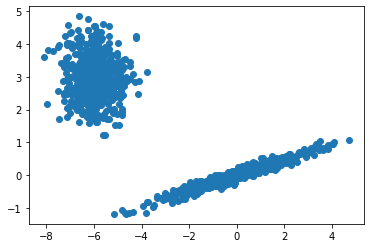

In [26]:
#plot
plt.scatter(df['normalized_age'], df['normalized_salary'])

In [ ]:
#choix du nombres de centroids

In [134]:
#calcul de la distance de chaque à chaque centroids

#lister les 2 centroids initialisés
centroids = [[centroid1, centroid2]]

#dupliquer la matrice
X1 = X.copy()
X2 = X.copy()


#parcourir la matrice pour faire les soustractions

for i in range(len(X)):
    X1[i] = X1[i] - centroid1
    print(X)

#idem en comprehension de liste : 
#X[:] = [X - cluster1 for number in X]
#print(numbers)

[[ 6.79909806 -2.9224494 ]
 [ 9.92834924 -2.10762357]
 [ 4.45745841 -3.483774  ]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11090369]
 [-6.79933099  2.08232074]]
[[ 6.79909806 -2.9224494 ]
 [ 9.92834924 -2.10762357]
 [ 4.45745841 -3.483774  ]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11090369]
 [-6.79933099  2.08232074]]
[[ 6.79909806 -2.9224494 ]
 [ 9.92834924 -2.10762357]
 [ 4.45745841 -3.483774  ]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11090369]
 [-6.79933099  2.08232074]]
[[ 6.79909806 -2.9224494 ]
 [ 9.92834924 -2.10762357]
 [ 4.45745841 -3.483774  ]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11090369]
 [-6.79933099  2.08232074]]
[[ 6.79909806 -2.9224494 ]
 [ 9.92834924 -2.10762357]
 [ 4.45745841 -3.483774  ]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11090369]
 [-6.79933099  2.08232074]]
[[ 6.79909806 -2.9224494 ]
 [ 9.92834924 -2.10762357]
 [ 4.45745841 -3.483774  ]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11090369]
 [-6.79933099  2.082

 [-6.79933099  2.08232074]]
[[ 6.79909806 -2.9224494 ]
 [ 9.92834924 -2.10762357]
 [ 4.45745841 -3.483774  ]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11090369]
 [-6.79933099  2.08232074]]
[[ 6.79909806 -2.9224494 ]
 [ 9.92834924 -2.10762357]
 [ 4.45745841 -3.483774  ]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11090369]
 [-6.79933099  2.08232074]]
[[ 6.79909806 -2.9224494 ]
 [ 9.92834924 -2.10762357]
 [ 4.45745841 -3.483774  ]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11090369]
 [-6.79933099  2.08232074]]
[[ 6.79909806 -2.9224494 ]
 [ 9.92834924 -2.10762357]
 [ 4.45745841 -3.483774  ]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11090369]
 [-6.79933099  2.08232074]]
[[ 6.79909806 -2.9224494 ]
 [ 9.92834924 -2.10762357]
 [ 4.45745841 -3.483774  ]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11090369]
 [-6.79933099  2.08232074]]
[[ 6.79909806 -2.9224494 ]
 [ 9.92834924 -2.10762357]
 [ 4.45745841 -3.483774  ]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11

In [135]:
for i in range(len(X)):
    X2[i] = X2[i] - centroid1
    print(X2)

[[ 6.79909806 -2.9224494 ]
 [ 9.92834924 -2.10762357]
 [ 4.45745841 -3.483774  ]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11090369]
 [-6.79933099  2.08232074]]
[[ 6.79909806 -2.9224494 ]
 [ 9.92834924 -2.10762357]
 [ 4.45745841 -3.483774  ]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11090369]
 [-6.79933099  2.08232074]]
[[ 6.79909806 -2.9224494 ]
 [ 9.92834924 -2.10762357]
 [ 4.45745841 -3.483774  ]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11090369]
 [-6.79933099  2.08232074]]
[[ 6.79909806 -2.9224494 ]
 [ 9.92834924 -2.10762357]
 [ 4.45745841 -3.483774  ]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11090369]
 [-6.79933099  2.08232074]]
[[ 6.79909806 -2.9224494 ]
 [ 9.92834924 -2.10762357]
 [ 4.45745841 -3.483774  ]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11090369]
 [-6.79933099  2.08232074]]
[[ 6.79909806 -2.9224494 ]
 [ 9.92834924 -2.10762357]
 [ 4.45745841 -3.483774  ]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11090369]
 [-6.79933099  2.082

 [-6.79933099  2.08232074]]
[[ 6.79909806 -2.9224494 ]
 [ 9.92834924 -2.10762357]
 [ 4.45745841 -3.483774  ]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11090369]
 [-6.79933099  2.08232074]]
[[ 6.79909806 -2.9224494 ]
 [ 9.92834924 -2.10762357]
 [ 4.45745841 -3.483774  ]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11090369]
 [-6.79933099  2.08232074]]
[[ 6.79909806 -2.9224494 ]
 [ 9.92834924 -2.10762357]
 [ 4.45745841 -3.483774  ]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11090369]
 [-6.79933099  2.08232074]]
[[ 6.79909806 -2.9224494 ]
 [ 9.92834924 -2.10762357]
 [ 4.45745841 -3.483774  ]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11090369]
 [-6.79933099  2.08232074]]
[[ 6.79909806 -2.9224494 ]
 [ 9.92834924 -2.10762357]
 [ 4.45745841 -3.483774  ]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11090369]
 [-6.79933099  2.08232074]]
[[ 6.79909806 -2.9224494 ]
 [ 9.92834924 -2.10762357]
 [ 4.45745841 -3.483774  ]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11

In [136]:
#X.shape

In [99]:
#calcul de la moyenne de chaque colonne


def columns_means(data):
    means = [0 for i in range(len(data[0]))]
    for i in range(len(data[0])):
        column_values = [row[i] for row in data]
        means[i] = sum(column_values) / float(len(data))
    return means #liste des moyennes



In [19]:
X = df.values

#verifier la dimension de X pour qu'elle soit de deux colonnes
#utiliser index_col=0 pour lire le csv

X.shape[1]

def generate_one_centroid(X):
	"""
	retourn les coordinées d'un centroid choisit aléatoirement dans X

	"""

	index_centroid = np.random.choice(X.shape[0], 1, replace=False)
	centroid = X[index_centroid[0]]
	return centroid

In [20]:
generate_one_centroid(X)

array([-5.62145849,  1.72734566])

In [18]:
index_centroid = np.random.choice(X.shape[0], 1, replace=False)
index_centroid

array([813])

In [122]:
#distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in centroids]

In [ ]:
        #find the distance between the point and cluster; choose the nearest centroid
		for features in data:
			distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
			classification = distances.index(min(distances))
			self.classes[classification].append(features)

In [30]:


def calc_distance(x1, x2):
    distance = (sum((x1 - x2)**2))**0.5
    return distance



def generate_label(X, centroid1, centroid2):

    distances = []
    for centroid in centroids:
        distances.append(calc_distance(centroid, X[i])) # on calcule la distance euc entre chaq point et les centroid
    label = [z for z, val in enumerate(distances) if val==min(distances)]
    #distances.append(label[0])
    return label

In [8]:
#distance euclidienne par ex

In [ ]:
#réassigner les points en fonction

In [10]:
# moyenne sse par cluster
#clusters_sse = []

In [94]:
# tolerance = 0.01
#ou quand lalgo converge ! càd ex_centroid = nv_centroid

### 